In [34]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_tabnet
import pickle
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from Utility_Modified import *

from matplotlib import pyplot as plt

### Define optimizers

In [2]:
sgd = torch.optim.SGD

# SAM

In [3]:
sam_df = pd.DataFrame(columns=['n', 'p', 'd', 'rel_imp', 'irrel_imp', 'rand_imp', 'train_auc', 'valid_auc', 'test_auc', 'fn_rel', 'fp_irrel', 'fp_rand'])

### SAM; N = 50, p = 6, d = 4

In [37]:
data, info = get_files(50, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sam_50_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.14115 | train_auc: 0.5375  | valid_auc: 0.35714 |  0:00:00s
epoch 1  | loss: 2.33213 | train_auc: 0.59375 | valid_auc: 0.35714 |  0:00:00s
epoch 2  | loss: 1.62896 | train_auc: 0.60625 | valid_auc: 0.35714 |  0:00:00s
epoch 3  | loss: 1.23404 | train_auc: 0.6     | valid_auc: 0.42857 |  0:00:01s
epoch 4  | loss: 1.29191 | train_auc: 0.61562 | valid_auc: 0.5     |  0:00:01s
epoch 5  | loss: 1.15978 | train_auc: 0.6125  | valid_auc: 0.64286 |  0:00:01s
epoch 6  | loss: 1.17641 | train_auc: 0.55    | valid_auc: 0.71429 |  0:00:02s
epoch 7  | loss: 0.94105 | train_auc: 0.5375  | valid_auc: 0.57143 |  0:00:02s
epoch 8  | loss: 0.87185 | train_auc: 0.52187 | valid_auc: 0.42857 |  0:00:02s
epoch 9  | loss: 0.74895 | train_auc: 0.52813 | valid_auc: 0.42857 |  0:00:02s
epoch 10 | loss: 0.72536 | train_auc: 0.57188 | valid_auc: 0.42857 |  0:00:03s
epoch 11 | loss: 0.80829 | train_auc: 0.61875 | valid_auc: 0.35714 |  0:00:03s
epoch 12 | loss: 0.8365  | train_auc: 0.6375  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.21704398512881695
Average irrelevant feature importance: 0.017780261219575686
Average random feature importance: 0.12814281152090976
Train AUC score: 0.9672619047619048
Validation AUC score: 1.0
Test AUC score: 0.25
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.0
False positive rate for random features: 0.75


C:\Users\hberg\AppData\Local\Temp\ipykernel_53020\1743350885.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)


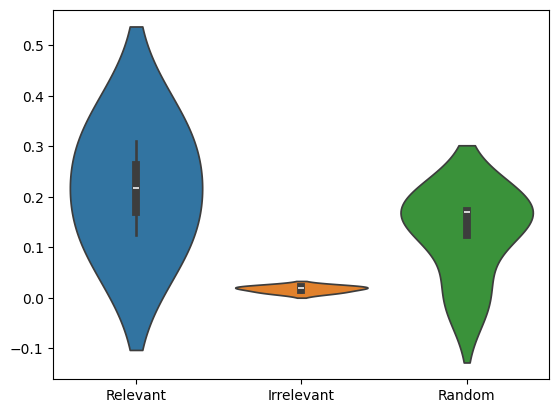

In [5]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_50_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_50_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_50_6_4.png"))
new_row = {'n': 50, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 50, p = 60, d = 40

In [6]:
data, info = get_files(50, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sam_50_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.91402 | train_auc: 0.40936 | valid_auc: 0.75    |  0:00:00s
epoch 1  | loss: 0.80171 | train_auc: 0.5848  | valid_auc: 0.58333 |  0:00:00s
epoch 2  | loss: 1.00743 | train_auc: 0.59064 | valid_auc: 0.66667 |  0:00:01s
epoch 3  | loss: 1.09169 | train_auc: 0.52339 | valid_auc: 0.58333 |  0:00:01s
epoch 4  | loss: 0.75473 | train_auc: 0.44444 | valid_auc: 0.66667 |  0:00:01s
epoch 5  | loss: 0.69783 | train_auc: 0.4386  | valid_auc: 0.75    |  0:00:02s
epoch 6  | loss: 0.96864 | train_auc: 0.45029 | valid_auc: 0.83333 |  0:00:02s
epoch 7  | loss: 0.93699 | train_auc: 0.39766 | valid_auc: 0.83333 |  0:00:02s
epoch 8  | loss: 0.78637 | train_auc: 0.42982 | valid_auc: 0.66667 |  0:00:03s
epoch 9  | loss: 0.72375 | train_auc: 0.45322 | valid_auc: 0.41667 |  0:00:03s
epoch 10 | loss: 0.73616 | train_auc: 0.47661 | valid_auc: 0.25    |  0:00:03s
epoch 11 | loss: 0.85241 | train_auc: 0.54386 | valid_auc: 0.41667 |  0:00:04s
epoch 12 | loss: 0.77328 | train_auc: 0.50292 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.008531765701293324
Average irrelevant feature importance: 0.0107421408490637
Average random feature importance: 0.010426307957599013
Train AUC score: 0.6023391812865498
Validation AUC score: 1.0
Test AUC score: 0.4
False negative rate for relevant features: 0.5217391304347826
False positive rate for irrelevant features: 0.5277777777777778
False positive rate for random features: 0.5


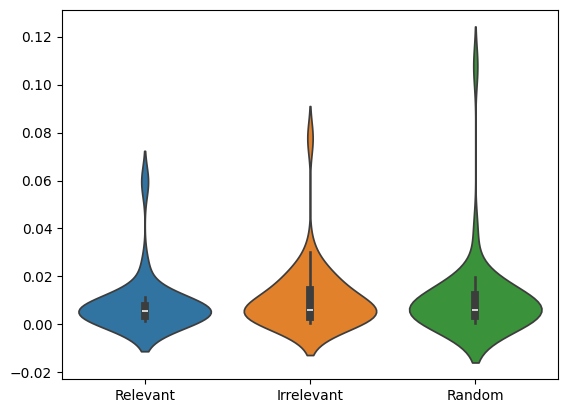

In [7]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_50_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_50_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_50_60_40.png"))
new_row = {'n': 50, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 50, p = 600, d = 400

In [8]:
data, info = get_files(50, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sam_50_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.05623 | train_auc: 0.41667 | valid_auc: 0.75    |  0:00:01s
epoch 1  | loss: 0.90141 | train_auc: 0.44345 | valid_auc: 1.0     |  0:00:03s
epoch 2  | loss: 0.93643 | train_auc: 0.36607 | valid_auc: 1.0     |  0:00:05s
epoch 3  | loss: 0.70515 | train_auc: 0.27083 | valid_auc: 1.0     |  0:00:07s
epoch 4  | loss: 0.95618 | train_auc: 0.32738 | valid_auc: 1.0     |  0:00:09s
epoch 5  | loss: 0.95129 | train_auc: 0.32738 | valid_auc: 1.0     |  0:00:11s
epoch 6  | loss: 0.89773 | train_auc: 0.33929 | valid_auc: 0.83333 |  0:00:13s
epoch 7  | loss: 1.10641 | train_auc: 0.34821 | valid_auc: 0.75    |  0:00:14s
epoch 8  | loss: 0.84271 | train_auc: 0.36905 | valid_auc: 0.66667 |  0:00:16s
epoch 9  | loss: 0.87162 | train_auc: 0.36012 | valid_auc: 0.75    |  0:00:18s
epoch 10 | loss: 0.87238 | train_auc: 0.33929 | valid_auc: 0.58333 |  0:00:20s
epoch 11 | loss: 1.0035  | train_auc: 0.33929 | valid_auc: 0.58333 |  0:00:22s
epoch 12 | loss: 0.83315 | train_auc: 0.27381 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.000450103627428878
Average irrelevant feature importance: 0.0009338279113505034
Average random feature importance: 0.0011499651311447838
Train AUC score: 0.44345238095238093
Validation AUC score: 1.0
Test AUC score: 0.75
False negative rate for relevant features: 0.475
False positive rate for irrelevant features: 0.49552772808586765
False positive rate for random features: 0.5025


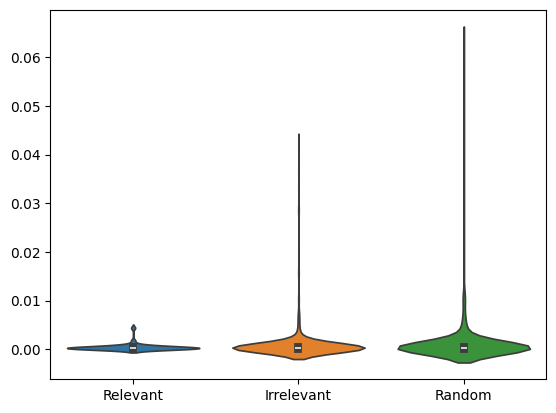

In [9]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_50_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_50_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_50_600_400.png"))
new_row = {'n': 50, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 500, p = 6, d = 4

In [10]:
data, info = get_files(500, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sam_500_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.99393 | train_auc: 0.60337 | valid_auc: 0.61887 |  0:00:02s
epoch 1  | loss: 0.72588 | train_auc: 0.64876 | valid_auc: 0.54446 |  0:00:04s
epoch 2  | loss: 0.61506 | train_auc: 0.77593 | valid_auc: 0.68603 |  0:00:06s
epoch 3  | loss: 0.51353 | train_auc: 0.90429 | valid_auc: 0.85481 |  0:00:08s
epoch 4  | loss: 0.51002 | train_auc: 0.87948 | valid_auc: 0.86751 |  0:00:10s
epoch 5  | loss: 0.39251 | train_auc: 0.92591 | valid_auc: 0.88929 |  0:00:12s
epoch 6  | loss: 0.35517 | train_auc: 0.9534  | valid_auc: 0.94737 |  0:00:14s
epoch 7  | loss: 0.32245 | train_auc: 0.9238  | valid_auc: 0.92196 |  0:00:16s
epoch 8  | loss: 0.31247 | train_auc: 0.91718 | valid_auc: 0.9147  |  0:00:19s
epoch 9  | loss: 0.27159 | train_auc: 0.90871 | valid_auc: 0.90563 |  0:00:20s
epoch 10 | loss: 0.31863 | train_auc: 0.87972 | valid_auc: 0.87296 |  0:00:22s
epoch 11 | loss: 0.31901 | train_auc: 0.92579 | valid_auc: 0.93103 |  0:00:24s
epoch 12 | loss: 0.2974  | train_auc: 0.91955 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.20457727060695216
Average irrelevant feature importance: 0.172634019327128
Average random feature importance: 0.010250037381221877
Train AUC score: 0.9962639495390587
Validation AUC score: 1.0
Test AUC score: 0.9583333333333334
False negative rate for relevant features: 0.3333333333333333
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


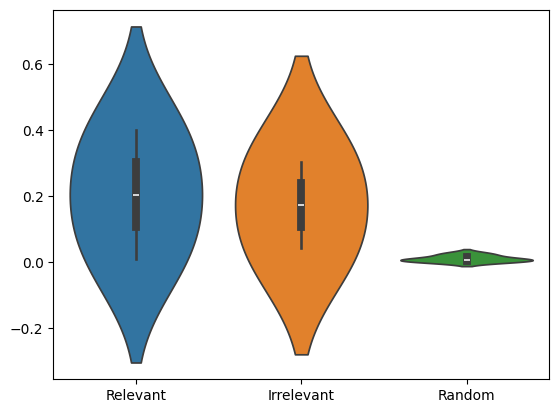

In [11]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_500_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_500_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_500_6_4.png"))
new_row = {'n': 500, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 500, p = 60, d = 40

In [12]:
data, info = get_files(500, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sam_500_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.03837 | train_auc: 0.44805 | valid_auc: 0.51953 |  0:00:02s
epoch 1  | loss: 0.91267 | train_auc: 0.48104 | valid_auc: 0.44727 |  0:00:04s
epoch 2  | loss: 0.84601 | train_auc: 0.42767 | valid_auc: 0.54492 |  0:00:06s
epoch 3  | loss: 0.80214 | train_auc: 0.44942 | valid_auc: 0.49219 |  0:00:09s
epoch 4  | loss: 0.74824 | train_auc: 0.50817 | valid_auc: 0.41992 |  0:00:11s
epoch 5  | loss: 0.73358 | train_auc: 0.55244 | valid_auc: 0.46875 |  0:00:13s
epoch 6  | loss: 0.7099  | train_auc: 0.51999 | valid_auc: 0.4668  |  0:00:15s
epoch 7  | loss: 0.71821 | train_auc: 0.49535 | valid_auc: 0.49023 |  0:00:18s
epoch 8  | loss: 0.70936 | train_auc: 0.56678 | valid_auc: 0.62891 |  0:00:20s
epoch 9  | loss: 0.70786 | train_auc: 0.51978 | valid_auc: 0.49609 |  0:00:22s
epoch 10 | loss: 0.69693 | train_auc: 0.56671 | valid_auc: 0.5957  |  0:00:24s
epoch 11 | loss: 0.72238 | train_auc: 0.58199 | valid_auc: 0.47266 |  0:00:26s
epoch 12 | loss: 0.7129  | train_auc: 0.54528 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.022009692870670994
Average irrelevant feature importance: 0.012705991358522031
Average random feature importance: 0.002071997065712971
Train AUC score: 0.9999737381164977
Validation AUC score: 0.951171875
Test AUC score: 0.8561253561253562
False negative rate for relevant features: 0.4444444444444444
False positive rate for irrelevant features: 0.36585365853658536
False positive rate for random features: 0.6


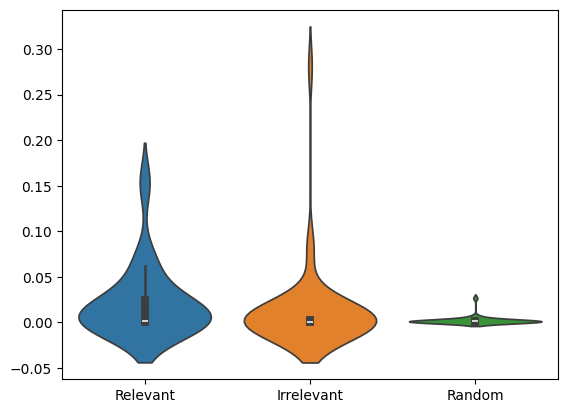

In [13]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_500_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_500_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_500_60_40.png"))
new_row = {'n': 500, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 500, p = 600, d = 400

In [14]:
data, info = get_files(500, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sam_500_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.50094 | train_auc: 0.42915 | valid_auc: 0.34783 |  0:00:04s
epoch 1  | loss: 1.30878 | train_auc: 0.5311  | valid_auc: 0.52536 |  0:00:09s
epoch 2  | loss: 1.27457 | train_auc: 0.53863 | valid_auc: 0.65761 |  0:00:13s
epoch 3  | loss: 1.05601 | train_auc: 0.58745 | valid_auc: 0.65761 |  0:00:18s
epoch 4  | loss: 0.9758  | train_auc: 0.55166 | valid_auc: 0.55072 |  0:00:23s
epoch 5  | loss: 1.01404 | train_auc: 0.53095 | valid_auc: 0.53261 |  0:00:27s
epoch 6  | loss: 0.93922 | train_auc: 0.64236 | valid_auc: 0.69203 |  0:00:31s
epoch 7  | loss: 0.9044  | train_auc: 0.64498 | valid_auc: 0.63406 |  0:00:36s
epoch 8  | loss: 0.85319 | train_auc: 0.61875 | valid_auc: 0.75906 |  0:00:40s
epoch 9  | loss: 0.84735 | train_auc: 0.65651 | valid_auc: 0.67935 |  0:00:45s
epoch 10 | loss: 0.82573 | train_auc: 0.67665 | valid_auc: 0.73732 |  0:00:51s
epoch 11 | loss: 0.75145 | train_auc: 0.61136 | valid_auc: 0.6087  |  0:00:56s
epoch 12 | loss: 0.72558 | train_auc: 0.70523 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.00022749131093080166
Average irrelevant feature importance: 0.0014914209755514396
Average random feature importance: 0.0005731000327822241
Train AUC score: 1.0
Validation AUC score: 0.9981884057971014
Test AUC score: 0.9333333333333333
False negative rate for relevant features: 0.5773195876288659
False positive rate for irrelevant features: 0.5159362549800797
False positive rate for random features: 0.4975


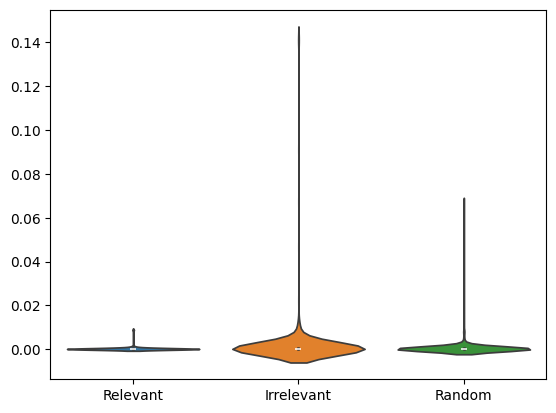

In [15]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_500_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_500_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_500_600_400.png"))
new_row = {'n': 500, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 5000, p = 6, d = 4

In [16]:
data, info = get_files(5000, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sam_5000_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.57816 | train_auc: 0.88678 | valid_auc: 0.88984 |  0:00:16s
epoch 1  | loss: 0.48997 | train_auc: 0.90105 | valid_auc: 0.91082 |  0:00:34s
epoch 2  | loss: 0.48066 | train_auc: 0.90471 | valid_auc: 0.90428 |  0:00:51s
epoch 3  | loss: 0.45454 | train_auc: 0.9051  | valid_auc: 0.91922 |  0:01:08s
epoch 4  | loss: 0.46949 | train_auc: 0.90976 | valid_auc: 0.9136  |  0:01:26s
epoch 5  | loss: 0.45662 | train_auc: 0.9085  | valid_auc: 0.91289 |  0:01:43s
epoch 6  | loss: 0.46026 | train_auc: 0.90754 | valid_auc: 0.9108  |  0:02:00s
epoch 7  | loss: 0.46437 | train_auc: 0.90713 | valid_auc: 0.91453 |  0:02:18s
epoch 8  | loss: 0.47026 | train_auc: 0.90919 | valid_auc: 0.91585 |  0:02:35s
epoch 9  | loss: 0.45316 | train_auc: 0.90582 | valid_auc: 0.91851 |  0:02:53s
epoch 10 | loss: 0.45583 | train_auc: 0.91015 | valid_auc: 0.91734 |  0:03:11s
epoch 11 | loss: 0.43677 | train_auc: 0.9086  | valid_auc: 0.91392 |  0:03:28s
epoch 12 | loss: 0.46185 | train_auc: 0.90724 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.09663168513148795
Average irrelevant feature importance: 0.3141387851844052
Average random feature importance: 0.07483361857241075
Relevant: [0.1892879  0.05982062 0.00330316 0.13411506]
Irrelevant: [0.31413879]
Random: [0.00559481 0.00148251 0.25249162 0.03976553]
Train AUC score: 0.9111291801724251
Validation AUC score: 0.922593244662751
Test AUC score: 0.9308319408577649
False negative rate for relevant features: 0.25
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.25


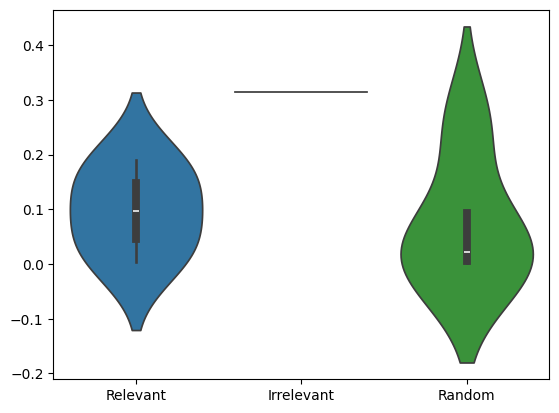

In [17]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_5000_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_5000_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_5000_6_4.png"))
new_row = {'n': 5000, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 5000, p = 60, d = 40

In [18]:
data, info = get_files(5000, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sam_5000_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.71033 | train_auc: 0.8476  | valid_auc: 0.87262 |  0:00:18s
epoch 1  | loss: 0.54401 | train_auc: 0.9053  | valid_auc: 0.91153 |  0:00:36s
epoch 2  | loss: 0.49073 | train_auc: 0.92406 | valid_auc: 0.92772 |  0:00:54s
epoch 3  | loss: 0.44341 | train_auc: 0.94513 | valid_auc: 0.95537 |  0:01:13s
epoch 4  | loss: 0.39671 | train_auc: 0.9738  | valid_auc: 0.97481 |  0:01:31s
epoch 5  | loss: 0.36084 | train_auc: 0.97512 | valid_auc: 0.98    |  0:01:50s
epoch 6  | loss: 0.34169 | train_auc: 0.98547 | valid_auc: 0.986   |  0:02:08s
epoch 7  | loss: 0.32067 | train_auc: 0.99001 | valid_auc: 0.99112 |  0:02:27s
epoch 8  | loss: 0.32485 | train_auc: 0.99077 | valid_auc: 0.99084 |  0:02:45s
epoch 9  | loss: 0.30755 | train_auc: 0.98641 | valid_auc: 0.98446 |  0:03:03s
epoch 10 | loss: 0.31537 | train_auc: 0.98763 | valid_auc: 0.99003 |  0:03:22s
epoch 11 | loss: 0.30687 | train_auc: 0.98883 | valid_auc: 0.99006 |  0:03:40s
epoch 12 | loss: 0.34075 | train_auc: 0.99232 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.005757941027847998
Average irrelevant feature importance: 0.01941560867663528
Average random feature importance: 0.00011783580537946311
Relevant: [0.00028426 0.00011344 0.00040086 0.00011946 0.00012503 0.00011395
 0.00030327 0.00011662 0.06152323 0.00011707 0.00012016]
Irrelevant: [1.13888769e-04 1.51291852e-04 2.39251340e-04 6.75775233e-04
 1.65011466e-01 1.16632611e-04 1.17350299e-04 1.51906765e-04
 1.12475702e-04 1.23803867e-04 1.20827981e-04 1.12578160e-01
 1.17696243e-04 1.12439487e-04 9.95662337e-04 1.09579912e-01
 9.51909611e-02 1.19536670e-04 7.15882986e-02 1.16725265e-04
 1.10951041e-04 1.51549492e-03 1.16240738e-04 1.17236174e-04
 1.14971348e-04 1.21307363e-04 1.16899195e-04 1.28214991e-04
 1.92758973e-01 1.21823074e-04 1.13913406e-04 1.00393849e-04
 5.30288452e-02 1.20391761e-04 1.22503854e-04 1.21704052e-01
 1.19843273e-04 1.19260877e-04 1.19435303e-04 1.15018958e-04
 1.18403270e-04 1.10396188e-04 1.18156375e-04 1.23316332e-04
 1.18979

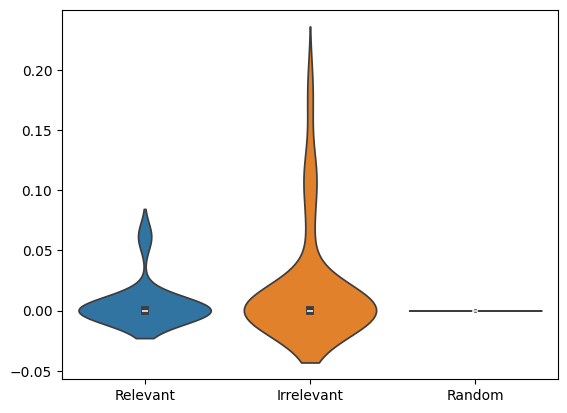

In [19]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_5000_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_5000_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_5000_60_40.png"))
new_row = {'n': 5000, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 5000, p = 600, d = 400

In [20]:
data, info = get_files(5000, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, lr = 0.1, gamma = 0.1, optimizer = sgd)
clf_sam_5000_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.83346 | train_auc: 0.47392 | valid_auc: 0.45671 |  0:00:38s
epoch 1  | loss: 0.69703 | train_auc: 0.77831 | valid_auc: 0.77048 |  0:01:18s
epoch 2  | loss: 0.57273 | train_auc: 0.87349 | valid_auc: 0.85596 |  0:01:57s
epoch 3  | loss: 0.49519 | train_auc: 0.89751 | valid_auc: 0.87159 |  0:02:36s
epoch 4  | loss: 0.46701 | train_auc: 0.90569 | valid_auc: 0.88053 |  0:03:15s
epoch 5  | loss: 0.44565 | train_auc: 0.92677 | valid_auc: 0.89746 |  0:03:55s
epoch 6  | loss: 0.42888 | train_auc: 0.94629 | valid_auc: 0.91191 |  0:04:34s
epoch 7  | loss: 0.39089 | train_auc: 0.95513 | valid_auc: 0.9121  |  0:05:14s
epoch 8  | loss: 0.37548 | train_auc: 0.9637  | valid_auc: 0.91655 |  0:05:53s
epoch 9  | loss: 0.34373 | train_auc: 0.97409 | valid_auc: 0.92537 |  0:06:33s
epoch 10 | loss: 0.33906 | train_auc: 0.97644 | valid_auc: 0.92358 |  0:07:13s
epoch 11 | loss: 0.33354 | train_auc: 0.97924 | valid_auc: 0.93076 |  0:07:54s
epoch 12 | loss: 0.34015 | train_auc: 0.98122 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0006552878756409126
Average irrelevant feature importance: 0.0027111374996878564
Average random feature importance: 0.0001824041505972205
Train AUC score: 0.9863252629673414
Validation AUC score: 0.9364646059146259
Test AUC score: 0.949481431917029
False negative rate for relevant features: 0.5191740412979351
False positive rate for irrelevant features: 0.55
False positive rate for random features: 0.485


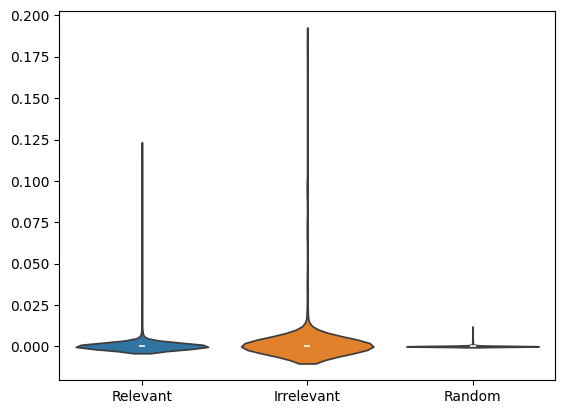

In [21]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_5000_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_5000_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_5000_600_400.png"))
new_row = {'n': 5000, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

In [22]:
sam_df.to_csv(os.path.join("Results/SAM", "sam_data.csv"), index=False)

# Adam

In [ ]:
adam_df = pd.DataFrame(columns=['n', 'p', 'd', 'rel_imp', 'irrel_imp', 'rand_imp', 'train_auc', 'valid_auc', 'test_auc', 'fn_rel', 'fp_irrel', 'fp_rand'])

### Adam; N = 50, p = 6, d = 4

In [ ]:
data, info = get_files(50, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_50_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_6_4.png"))
new_row = {'n': 50, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 50, p = 60, d = 40

In [ ]:
data, info = get_files(50, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_50_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_60_40.png"))
new_row = {'n': 50, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 50, p = 600, d = 400

In [ ]:
data, info = get_files(50, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_50_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_600_400.png"))
new_row = {'n': 50, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 500, p = 6, d = 4

In [ ]:
data, info = get_files(500, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_500_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_6_4.png"))
new_row = {'n': 500, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 500, p = 60, d = 40

In [ ]:
data, info = get_files(500, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_500_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_60_40.png"))
new_row = {'n': 500, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 500, p = 600, d = 400

In [ ]:
data, info = get_files(500, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_500_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_600_400.png"))
new_row = {'n': 500, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 6, d = 4

In [ ]:
data, info = get_files(5000, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_5000_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_6_4.png"))
new_row = {'n': 5000, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 60, d = 40

In [ ]:
data, info = get_files(5000, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_5000_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_60_40.png"))
new_row = {'n': 5000, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 600, d = 400

In [ ]:
data, info = get_files(5000, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_5000_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_600_400.png"))
new_row = {'n': 5000, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

In [ ]:
adam_df.to_csv(os.path.join("Results/Adam", "adam_data.csv"), index=False)

# Test

In [38]:
print(clf._optimizer)

SAM (
Parameter Group 0
    adaptive: True
    dampening: 0
    differentiable: False
    foreach: None
    initial_lr: 0.1
    lr: 0.010000000000000002
    maximize: False
    momentum: 0.9
    nesterov: False
    rho: 0.05
    weight_decay: 0.0005
)
